In [64]:
import torch
from torch import nn, optim
import torchvision
from torchvision import transforms

In [65]:
# device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [66]:
# hyper Paramater
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [67]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

<img src="https://ds055uzetaobb.cloudfront.net/brioche/uploads/uzLXsnBLTI-fully_connected_mlp.png?width=1200" />

In [68]:
class FNN(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(FNN, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, num_classes)
  def forward(self, x):
    # input layer
    out = self.fc1(x)
    out = self.relu(out)
    
    # hidden layer 1
    out = self.fc2(out)
    out = self.relu(out)

    out = self.fc3(out)
    return out

model = FNN(input_size, hidden_size, num_classes).to(device)
print(model)

FNN(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
)


In [69]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [70]:
for i, (images, labels) in enumerate(train_loader):
  print(images.size())
  break

torch.Size([100, 1, 28, 28])


In [71]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../../data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [72]:
# train model
total_step = len(train_loader)
for epoch in range(num_epochs):
  total = 0
  correct = 0
  for i, (images, labels) in enumerate(train_loader):
    # reshape tensor and move to configured device
    images = images.view(-1, input_size).to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()  
    
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    if (i+1) % 100 == 0:
      print ('Epoch [{}/{}], Step [{}/{}], Acc : {:.4f} ,Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, (correct / total), loss.item()))

Epoch [1/5], Step [100/600], Acc : 0.8349 ,Loss: 0.4149
Epoch [1/5], Step [200/600], Acc : 0.8795 ,Loss: 0.1134
Epoch [1/5], Step [300/600], Acc : 0.8996 ,Loss: 0.1189
Epoch [1/5], Step [400/600], Acc : 0.9122 ,Loss: 0.1808
Epoch [1/5], Step [500/600], Acc : 0.9207 ,Loss: 0.1663
Epoch [1/5], Step [600/600], Acc : 0.9281 ,Loss: 0.0293
Epoch [2/5], Step [100/600], Acc : 0.9679 ,Loss: 0.0190
Epoch [2/5], Step [200/600], Acc : 0.9699 ,Loss: 0.1848
Epoch [2/5], Step [300/600], Acc : 0.9697 ,Loss: 0.1085
Epoch [2/5], Step [400/600], Acc : 0.9708 ,Loss: 0.1390
Epoch [2/5], Step [500/600], Acc : 0.9714 ,Loss: 0.0494
Epoch [2/5], Step [600/600], Acc : 0.9719 ,Loss: 0.1176
Epoch [3/5], Step [100/600], Acc : 0.9815 ,Loss: 0.0582
Epoch [3/5], Step [200/600], Acc : 0.9819 ,Loss: 0.1210
Epoch [3/5], Step [300/600], Acc : 0.9817 ,Loss: 0.0662
Epoch [3/5], Step [400/600], Acc : 0.9815 ,Loss: 0.1132
Epoch [3/5], Step [500/600], Acc : 0.9812 ,Loss: 0.0455
Epoch [3/5], Step [600/600], Acc : 0.9813 ,Loss:

In [73]:
# tess model
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.view(-1, input_size).to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


# # Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the 10000 test images: 97.54 %


In [77]:
# !pip install torchviz

In [75]:
from torchviz import make_dot, make_dot_from_trace


dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.view(-1, input_size).to(device)
yhat = model(images) # Give dummy batch to forward().

torch.Size([100, 784])


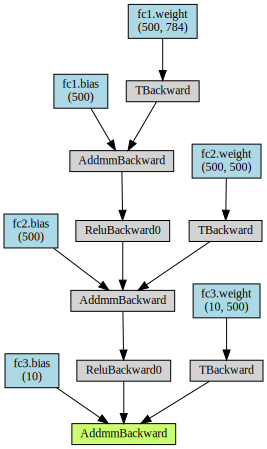

In [76]:
make_dot(yhat, params=dict(list(model.named_parameters())))